# Getting job profiles (in Boston) using indeed API

## ABSTRACT

We are working on Job Profiles database. We will be extracting job profile data from 3 distinct sources and will be munging the data to form a consistent dataset of Project Management (PM) job profiles in Boston along with known contacts (from linkedIn) matching the job profiles. We will clean the dataset to make it error free and consistent.

Finally, we will be developing a database using the extracted data and display the conceptual form in Entity-Relationship Diagram.

We plan to pull job profiles in and around Boston from Job portals/websites using respective Web APIs. 

However as communicated via email, 

LinkedIn requires us to develop an application in order for them to provide an API key as per the documentation and it does not allow us to Web scrape the missing data for data set.

Glassdoor, we need to be a partner to be able to receive an API key (we have raised a request, no reply yet)

With Indeed, it requires us to register as a publisher in order to receive an API key (takes 7 business days, still awaiting response) (https://www.indeed.com/publisher)

Simplyhired jobs API is currently not available (https://rapidapi.com/blog/directory/simply-hired-jobs/)

Once we receive the Indeed API key, we'll pull the data from API. However, for this assignment we will have all the code that's necessary to pull data.

The dataset used will be primarily from Indeed.com and it contains details about all the PM job profiles in and around Boston.

## Data

Each row in the database represents a job profile.

Job profiles data conists of -

Job Title

Comoany

Location

Summary

Salary

Rating

### Importing Libraries

In [4]:
#importing neccessary libraries for reading raw data and pandas
import pandas as pd
import os

## Data Source - 1: Raw Data

In [2]:
dsrc1 = pd.read_csv("C:/Users/Admin/Desktop/DMDD/Assignment_1/my_connections.csv")

### Displaying the data

In [5]:
dsrc1.head()

First Name Last Name             Email Address  \
0     Vijay Anthony   Richard                       NaN   
1  Adithya Chowdary     Eluri  adithya.e@fluxteksol.com   
2            Naveen  Upputuri                       NaN   
3            Punith  Giridhar                       NaN   
4      HEM BHUPAAL    REDDY M    hembhupaal24@gmail.com   

                 Company                            Position Connected On  
0                 Amazon  Program Manager, Delivery Strategy  22 Jan 2020  
1  Fluxtek Solutions Inc                    SR OPT Recruiter  30 Dec 2019  
2  Fluxtek Solutions Inc             Sr. Resource Specialist  30 Dec 2019  
3                  ARRIS             Supply Planning Analyst  08 Dec 2019  
4   Himalaya Clothing Co   Business Strategy Insights Intern  06 Dec 2019

### Checking datatypes and number of records of each column

In [6]:
#to check for uniformity of datatypes
dsrc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
First Name       90 non-null object
Last Name        90 non-null object
Email Address    2 non-null object
Company          87 non-null object
Position         87 non-null object
Connected On     90 non-null object
dtypes: object(6)
memory usage: 4.3+ KB


### Finding the missing values

In [7]:
# checking for NaN values in the dataset
dsrc1.isnull().any()

First Name       False
Last Name        False
Email Address     True
Company           True
Position          True
Connected On     False
dtype: bool

### Checking for total null values in each column

In [8]:
#to higlight errors
dsrc1.isnull().sum()

First Name        0
Last Name         0
Email Address    88
Company           3
Position          3
Connected On      0
dtype: int64

### Columns with null values

In [9]:
dsrc1['Email Address']

0                          NaN
1     adithya.e@fluxteksol.com
2                          NaN
3                          NaN
4       hembhupaal24@gmail.com
                ...           
85                         NaN
86                         NaN
87                         NaN
88                         NaN
89                         NaN
Name: Email Address, Length: 90, dtype: object

### Checking shape of the data

In [10]:
dsrc1.shape

(90, 6)

### Columns present in data source

In [11]:
dsrc1.columns

Index(['First Name', 'Last Name', 'Email Address', 'Company', 'Position',
       'Connected On'],
      dtype='object')

## Data Source - 2: Web Scraping data using Beautiful Soup

### Beautiful Soup
Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.
We will scrap job profiles data from indeed website

### Web scraping first 25 pages of https://www.indeed.com/jobs?q=project+management&l=Boston%2C+MA

In [12]:
#importing libraries neccessary for web scraping
import requests
import json
import time
from bs4 import BeautifulSoup
        
job_titles=[]
companies=[]
locations=[]
summaries=[]
salaries=[]
ratings=[]

for page in range(0,240,10):
    source = requests.get("https://www.indeed.com/jobs?q=project+management&l=Boston%2C+MA&start={}".format(page)).text
    soup = BeautifulSoup(source, "lxml")

    for jobs in soup.find_all(class_='result'):

        #using exceptions to handle missing info               
        try:
            job_title = jobs.a.text.strip()
        except Exception as e:
            job_title = None
        job_titles.append(job_title)


        try:
            company = jobs.span.text.strip()
        except Exception as e:
            company = None
        companies.append(company)

        try:
            location = jobs.find('div', class_='location accessible-contrast-color-location').text.strip()
        except Exception as e:
            location = None
        locations.append(location)

        try:
            summary = jobs.find('div', class_= 'summary').text.strip()
        except Exception as e:
            summary = None
        summaries.append(summary)

        try:
            salary = jobs.find('span', class_= 'salary no-wrap').text.strip()
        except Exception as e:
            salary = None
        salaries.append(salary)

        try:
            rating = jobs.find('span', class_= 'ratingsContent').text.strip()
        except Exception as e:
            rating = None
        ratings.append(rating)
        
        time.sleep(0.3)

### Displaying scraped data

In [13]:
for t in job_titles:
    if t == None:
        t = ""
    print("Job Title: " + t)

for c in companies:
    if c == None:
        c = ""
    print("Company: " + c)

for l in locations:
    if l == None:
        l = ""
    print("Location: " + l)

for su in summaries:
    if su == None:
        su = ""
    print("Summary: " + su)

for s in salaries:
    if s == None:
        s = ""
    print("Salary: " + s)

for r in ratings:
    if r == None:
        r = ""
    print("Rating: " + r)

Job Title: Estimator/Project Manager
Job Title: Project Manager
Job Title: Clinical Project Manager
Job Title: 
Job Title: Associate Director, Program Management
Job Title: Office Manager/Project Manager at dance studio
Job Title: Project Manager | Branding Agency | 3 Years Experience Requi...
Job Title: Project Management Associate
Job Title: Project Manager
Job Title: Associate Director, Project Management - Genetics
Job Title: Associate, Technical Project Management
Job Title: Project Associate
Job Title: VP, Project Manager-Relationship Management
Job Title: Localization Project Manager
Job Title: Associate Management (Account/Project Management) - Boston I...
Job Title: Project Manager (E-terra) - 200020
Job Title: Project Manager - Capacity Management Client Services
Job Title: Creative Project Manager
Job Title: Project Manager II
Job Title: Estimator/Project Manager
Job Title: Project Manager
Job Title: Project Manager
Job Title: Construction Project Manager- Min. 3 Years Exp.


Salary: $55,000 - $65,000 a year
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: $45,000 - $50,000 a year
Salary: 
Salary: $100,000 - $140,000 a year
Salary: 
Salary: $108,601 - $134,100 a year
Salary: $55,000 - $65,000 a year
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: $100,000 - $140,000 a year
Salary: 
Salary: $108,601 - $134,100 a year
Salary: $45,000 - $50,000 a year
Salary: 
Salary: 
Salary: $55,000 - $65,000 a year
Salary: $55,000 - $65,000 a year
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: $70,000 - $110,000 a year
Salary: 
Salary: 
Salary: 
Salary: 
Salary: $108,601 - $134,100 a year
Salary: $45,000 - $50,000 a year
Salary: 
Salary: $100,000 - $140,000 a year
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Salary: 
Sal

### Consolidating the scraped data into a JSON object

In [14]:
jobs_data_frame = []

for i in range(0,len(job_titles)-1):
    jobs_json = {
        "Job_Title":job_titles[i],
        "Company":companies[i],
        "Location":locations[i],
        "Summary":summaries[i],
        "Salary":salaries[i],
        "Rating":ratings[i]
    }
    jobs_data_frame.append(jobs_json)

## Cleaning and auditing the data

In [15]:
dsrc2 = pd.DataFrame(jobs_data_frame, columns = ["Job_Title","Company","Location","Summary","Salary","Rating"])

In [16]:
dsrc2.describe()

Job_Title           Company                          Location  \
count               447               447                               211   
unique              145               153                                21   
top     Project Manager  WaypointKLA Inc.  Boston, MA 02116 (Back Bay area)   
freq                107                24                                27   

                                                  Summary  \
count                                                 447   
unique                                                230   
top     May also perform some project work, such as re...   
freq                                                   21   

                            Salary Rating  
count                          121    209  
unique                          22     19  
top     $100,000 - $140,000 a year    3.6  
freq                            24     35

### Checking for duplicate rows/job profiles

In [17]:
#displaying the duplicate rows/job profiles
duplicate_rows = dsrc2[dsrc2.duplicated()]
print(duplicate_rows)

                                        Job_Title  \
19                      Estimator/Project Manager   
21                                Project Manager   
24         Associate Director, Program Management   
25                       Creative Project Manager   
38                                Project Manager   
..                                            ...   
442                     Estimator/Project Manager   
443                               Project Manager   
444                Green Building Project Manager   
445  Construction Project Manager 5 + yrs exp req   
446              Project Manager - Luxury Kitchen   

                            Company  \
19                 WaypointKLA Inc.   
21               Designer Advantage   
24         Ra Pharmaceuticals, Inc.   
25                      Gupta Media   
38               Designer Advantage   
..                              ...   
442                WaypointKLA Inc.   
443  BSA Construction & Development   
444         

In [21]:
#removing the duplicate rows
clean_dsrc2 = dsrc2.drop_duplicates(keep="first")
clean_dsrc2.describe()

Job_Title                              Company  \
count               244                                  244   
unique              145                                  153   
top     Project Manager  Massachusetts General Hospital(MGH)   
freq                 45                                    7   

                                Location  \
count                                 50   
unique                                21   
top     Boston, MA 02116 (Back Bay area)   
freq                                   6   

                                                  Summary  \
count                                                 244   
unique                                                230   
top     Well established Boston area GC seeks Project ...   
freq                                                    3   

                          Salary Rating  
count                         35    152  
unique                        22     19  
top     $55,000 - $65,000 a year    4.1  
freq                           6     18

### Removing unneccessary data
Because the jobs are based in boston and most of the data is not available on location we will remove the location column as it does not add much value. Although, most of the salary data is missing, we will still retain it. Because it is important for the decision making process.

In [22]:
clean_dsrc2.drop('Location', axis=1, inplace=True)
clean_dsrc2.describe()

Job_Title                              Company  \
count               244                                  244   
unique              145                                  153   
top     Project Manager  Massachusetts General Hospital(MGH)   
freq                 45                                    7   

                                                  Summary  \
count                                                 244   
unique                                                230   
top     Well established Boston area GC seeks Project ...   
freq                                                    3   

                          Salary Rating  
count                         35    152  
unique                        22     19  
top     $55,000 - $65,000 a year    4.1  
freq                           6     18

### Checking for uniqueness
As shown in the above table, no column has all unique values, so none of them on their own can be a primary key.
However, a combination of two columns can be checked for uniqeness.

In [23]:
test = clean_dsrc2.copy()
test['ID'] = test['Company'] + test['Job_Title']
test['ID'].is_unique

False

As the combination of main identifiers of a row are not unique and it does not make sense to use other combinations. We are adding a column called "Job ID" and assigning integer values to them to help uniquely identify each row.

In [24]:
#creating and appending job id
clean_dsrc2['Job_ID'] = range(1, 1+len(clean_dsrc2))
clean_dsrc2


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Job_Title  \
0                            Estimator/Project Manager   
1                                      Project Manager   
2                             Clinical Project Manager   
3                                                        
4               Associate Director, Program Management   
..                                                 ...   
435                                    Program Manager   
436         Senior Analyst, Project/Program Management   
437               IoT Sales Enablement Project Manager   
438                                    Project Manager   
439  Office of Diversity and Inclusion Program Manager   

                            Company  \
0                  WaypointKLA Inc.   
1                Designer Advantage   
2                           GENOSCO   
3                        Jack Henry   
4          Ra Pharmaceuticals, Inc.   
..                              ...   
435                             MIT   
436                            Dell   
437                             PTC   
438                          Mavens   
439  Federal Reserve Bank of Boston   

                                               Summary  \
0    ESTIMATOR for Owner's Project Management Compa...   
1    We are currently seeking professionals for pro...   
2    Genosco is a clinical-stage biopharmaceutical ...   
3    Are you an eager project manager with digital ...   
4    Experience in the drug development process inc...   
..                                                 ...   
435  PROGRAM MANAGER, Schwarzman College of Computi...   
436  Bedford, MA (Preferred) or Overland Park, KS.P...   
437  The IoT Sales Enablement Project Manager suppo...   
438  As we are primarily a remote organization, we ...   
439  Conducts external/market D&I research and anal...   

                         Salary Rating  Job_ID  
0    $100,000 - $140,000 a year   None       1  
1      $45,000 - $50,000 a year   None       2  
2                          None   None       3  
3                          None    3.5       4  
4    $150,000 - $200,000 a year   None       5  
..                          ...    ...     ...  
435                        None    4.2     240  
436                        None    4.0     241  
437                        None    3.7     242  
438                        None   None     243  
439                        None    4.0     244  

[244 rows x 6 columns]

### Checking consistency of datatypes and required information

In [25]:
clean_dsrc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 439
Data columns (total 6 columns):
Job_Title    244 non-null object
Company      244 non-null object
Summary      244 non-null object
Salary       35 non-null object
Rating       152 non-null object
Job_ID       244 non-null int32
dtypes: int32(1), object(5)
memory usage: 12.4+ KB


### Finding the missing values

In [26]:
clean_dsrc2.isnull().any()

Job_Title    False
Company      False
Summary      False
Salary        True
Rating        True
Job_ID       False
dtype: bool

### Checking for total null values in each column

In [27]:
clean_dsrc2.isnull().sum()

Job_Title      0
Company        0
Summary        0
Salary       209
Rating        92
Job_ID         0
dtype: int64

### Columns with null values

In [28]:
clean_dsrc2[['Salary', 'Rating']]

Salary Rating
0    $100,000 - $140,000 a year   None
1      $45,000 - $50,000 a year   None
2                          None   None
3                          None    3.5
4    $150,000 - $200,000 a year   None
..                          ...    ...
435                        None    4.2
436                        None    4.0
437                        None    3.7
438                        None   None
439                        None    4.0

[244 rows x 2 columns]

### Checking shape of the data

In [29]:
clean_dsrc2.shape

(244, 6)

## Data Source 3: Indeed web API

We plan to pull job profiles in and around Boston from Job portals/websites using respective Web APIs. 

However, 

LinkedIn requires us to develop an application in order for them to provide an API key as per the documentation and it does not allow us to Web scrape the missing data for data set.

Glassdoor, we need to be a partner to be able to receive an API key (we have raised a request, no reply yet)

With Indeed, it requires us to register as a publisher in order to receive an API key (takes 7 business days, still awaiting response) (https://www.indeed.com/publisher)

Simplyhired jobs API is currently not available (https://rapidapi.com/blog/directory/simply-hired-jobs/)

Once we receive the Indeed API key, we'll pull the data from API. However, for this assignment we will have all the code that's necessary to pull data in comments below

In [30]:
"""from Indeed import IndeedClient

client = IndeedClient(publisher = )

parameters = {
              'q' : "Project Manager",
              'l' : "Boston, MA",
              'fromage' : "5",
              'limit' : "50",
              'filter' : "1",
              'userip' : "10.0.0.15",
              'useragent' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0 Safari/605.1.15)"
             }
 
search_results = []

def get_offers(params):
      
    #perform search
   	search_results = client.search(**params)

get_offers(parameters)

#loop through each offer element
for elm in search_results['results']:

    #let's parse the offer
    offer = (elm['jobtitle'], 
             elm['formattedLocation'], 
             elm['snippet'], 
             elm['url'], 
             elm['indeedApply'], 
             elm['jobkey'], 
             elm['date'])
            """

'from Indeed import IndeedClient\n\nclient = IndeedClient(publisher = )\n\nparameters = {\n              \'q\' : "Project Manager",\n              \'l\' : "Boston, MA",\n              \'fromage\' : "5",\n              \'limit\' : "50",\n              \'filter\' : "1",\n              \'userip\' : "10.0.0.15",\n              \'useragent\' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0 Safari/605.1.15)"\n             }\n \nsearch_results = []\n\ndef get_offers(params):\n      \n    #perform search\n   \tsearch_results = client.search(**params)\n\nget_offers(parameters)\n\n#loop through each offer element\nfor elm in search_results[\'results\']:\n\n    #let\'s parse the offer\n    offer = (elm[\'jobtitle\'], \n             elm[\'formattedLocation\'], \n             elm[\'snippet\'], \n             elm[\'url\'], \n             elm[\'indeedApply\'], \n             elm[\'jobkey\'], \n             elm[\'date\'])\n            '

## Conceptual Model

### Combining Raw and Web-Scarped data  over Positions/Job Titles

In [31]:
#finding unique job titles from scraped data
uni_job_titles = clean_dsrc2.Job_Title.unique()

In [32]:
#finding all positions belonging to a unique person from raw data: my_connections.csv
positions = dsrc1['Position']

In [33]:
#checking if there are any matches
for job in uni_job_titles:
    for pos in positions:
        if job == pos:
            print(job)    

Since, there is no match found in "Positions" from the raw data (linkedIN connections) to "Job_titles" from second data source, combining the data does not add any value. Therefore, we have not displayed the "First Name" and "Last Name" columns from my connections. However, to demonstrate combining two data frames over a common id, we will take the web-scraped data without ratings and ratings alone in seperate dataframes, then we will combine them over the common Job_ID

In [34]:
clean_dsrc2

Job_Title  \
0                            Estimator/Project Manager   
1                                      Project Manager   
2                             Clinical Project Manager   
3                                                        
4               Associate Director, Program Management   
..                                                 ...   
435                                    Program Manager   
436         Senior Analyst, Project/Program Management   
437               IoT Sales Enablement Project Manager   
438                                    Project Manager   
439  Office of Diversity and Inclusion Program Manager   

                            Company  \
0                  WaypointKLA Inc.   
1                Designer Advantage   
2                           GENOSCO   
3                        Jack Henry   
4          Ra Pharmaceuticals, Inc.   
..                              ...   
435                             MIT   
436                            Dell   
437                             PTC   
438                          Mavens   
439  Federal Reserve Bank of Boston   

                                               Summary  \
0    ESTIMATOR for Owner's Project Management Compa...   
1    We are currently seeking professionals for pro...   
2    Genosco is a clinical-stage biopharmaceutical ...   
3    Are you an eager project manager with digital ...   
4    Experience in the drug development process inc...   
..                                                 ...   
435  PROGRAM MANAGER, Schwarzman College of Computi...   
436  Bedford, MA (Preferred) or Overland Park, KS.P...   
437  The IoT Sales Enablement Project Manager suppo...   
438  As we are primarily a remote organization, we ...   
439  Conducts external/market D&I research and anal...   

                         Salary Rating  Job_ID  
0    $100,000 - $140,000 a year   None       1  
1      $45,000 - $50,000 a year   None       2  
2                          None   None       3  
3                          None    3.5       4  
4    $150,000 - $200,000 a year   None       5  
..                          ...    ...     ...  
435                        None    4.2     240  
436                        None    4.0     241  
437                        None    3.7     242  
438                        None   None     243  
439                        None    4.0     244  

[244 rows x 6 columns]

In [35]:
#forming a new dataframe of ratings (we could also fetch ratings and job ids individually and form the same dtaframe)
rating_df = clean_dsrc2.loc[:,['Rating','Job_ID']]
rating_df

Rating  Job_ID
0     None       1
1     None       2
2     None       3
3      3.5       4
4     None       5
..     ...     ...
435    4.2     240
436    4.0     241
437    3.7     242
438   None     243
439    4.0     244

[244 rows x 2 columns]

In [36]:
#forming a dataframe without ratings
clean_dsrc2.drop('Rating', axis=1, inplace=True)

In [37]:
clean_dsrc2

Job_Title  \
0                            Estimator/Project Manager   
1                                      Project Manager   
2                             Clinical Project Manager   
3                                                        
4               Associate Director, Program Management   
..                                                 ...   
435                                    Program Manager   
436         Senior Analyst, Project/Program Management   
437               IoT Sales Enablement Project Manager   
438                                    Project Manager   
439  Office of Diversity and Inclusion Program Manager   

                            Company  \
0                  WaypointKLA Inc.   
1                Designer Advantage   
2                           GENOSCO   
3                        Jack Henry   
4          Ra Pharmaceuticals, Inc.   
..                              ...   
435                             MIT   
436                            Dell   
437                             PTC   
438                          Mavens   
439  Federal Reserve Bank of Boston   

                                               Summary  \
0    ESTIMATOR for Owner's Project Management Compa...   
1    We are currently seeking professionals for pro...   
2    Genosco is a clinical-stage biopharmaceutical ...   
3    Are you an eager project manager with digital ...   
4    Experience in the drug development process inc...   
..                                                 ...   
435  PROGRAM MANAGER, Schwarzman College of Computi...   
436  Bedford, MA (Preferred) or Overland Park, KS.P...   
437  The IoT Sales Enablement Project Manager suppo...   
438  As we are primarily a remote organization, we ...   
439  Conducts external/market D&I research and anal...   

                         Salary  Job_ID  
0    $100,000 - $140,000 a year       1  
1      $45,000 - $50,000 a year       2  
2                          None       3  
3                          None       4  
4    $150,000 - $200,000 a year       5  
..                          ...     ...  
435                        None     240  
436                        None     241  
437                        None     242  
438                        None     243  
439                        None     244  

[244 rows x 5 columns]

In [38]:
#combining two data frames over Job_ID with consistency
final_df = pd.merge(clean_dsrc2,rating_df,left_on='Job_ID',right_on='Job_ID') 

In [39]:
final_df

Job_Title  \
0                            Estimator/Project Manager   
1                                      Project Manager   
2                             Clinical Project Manager   
3                                                        
4               Associate Director, Program Management   
..                                                 ...   
239                                    Program Manager   
240         Senior Analyst, Project/Program Management   
241               IoT Sales Enablement Project Manager   
242                                    Project Manager   
243  Office of Diversity and Inclusion Program Manager   

                            Company  \
0                  WaypointKLA Inc.   
1                Designer Advantage   
2                           GENOSCO   
3                        Jack Henry   
4          Ra Pharmaceuticals, Inc.   
..                              ...   
239                             MIT   
240                            Dell   
241                             PTC   
242                          Mavens   
243  Federal Reserve Bank of Boston   

                                               Summary  \
0    ESTIMATOR for Owner's Project Management Compa...   
1    We are currently seeking professionals for pro...   
2    Genosco is a clinical-stage biopharmaceutical ...   
3    Are you an eager project manager with digital ...   
4    Experience in the drug development process inc...   
..                                                 ...   
239  PROGRAM MANAGER, Schwarzman College of Computi...   
240  Bedford, MA (Preferred) or Overland Park, KS.P...   
241  The IoT Sales Enablement Project Manager suppo...   
242  As we are primarily a remote organization, we ...   
243  Conducts external/market D&I research and anal...   

                         Salary  Job_ID Rating  
0    $100,000 - $140,000 a year       1   None  
1      $45,000 - $50,000 a year       2   None  
2                          None       3   None  
3                          None       4    3.5  
4    $150,000 - $200,000 a year       5   None  
..                          ...     ...    ...  
239                        None     240    4.2  
240                        None     241    4.0  
241                        None     242    3.7  
242                        None     243   None  
243                        None     244    4.0  

[244 rows x 6 columns]

## Generating .csv files

In [40]:
rating_df.to_csv("job_ratings.csv",encoding="utf-8",index=False)
clean_dsrc2.to_csv("job_details.csv",encoding="utf-8",index=False)
final_df.to_csv("job_profiles.csv",encoding="utf-8",index=False)

In [41]:
rating_df = pd.read_csv("job_ratings.csv")
rating_df.head()

Rating  Job_ID
0     NaN       1
1     NaN       2
2     NaN       3
3     3.5       4
4     NaN       5

In [42]:
clean_dsrc2 = pd.read_csv("job_details.csv")
clean_dsrc2.head()

Job_Title                   Company  \
0               Estimator/Project Manager          WaypointKLA Inc.   
1                         Project Manager        Designer Advantage   
2                Clinical Project Manager                   GENOSCO   
3                                     NaN                Jack Henry   
4  Associate Director, Program Management  Ra Pharmaceuticals, Inc.   

                                             Summary  \
0  ESTIMATOR for Owner's Project Management Compa...   
1  We are currently seeking professionals for pro...   
2  Genosco is a clinical-stage biopharmaceutical ...   
3  Are you an eager project manager with digital ...   
4  Experience in the drug development process inc...   

                       Salary  Job_ID  
0  $100,000 - $140,000 a year       1  
1    $45,000 - $50,000 a year       2  
2                         NaN       3  
3                         NaN       4  
4  $150,000 - $200,000 a year       5

In [43]:
final_df = pd.read_csv("job_profiles.csv")
final_df.head()

Job_Title                   Company  \
0               Estimator/Project Manager          WaypointKLA Inc.   
1                         Project Manager        Designer Advantage   
2                Clinical Project Manager                   GENOSCO   
3                                     NaN                Jack Henry   
4  Associate Director, Program Management  Ra Pharmaceuticals, Inc.   

                                             Summary  \
0  ESTIMATOR for Owner's Project Management Compa...   
1  We are currently seeking professionals for pro...   
2  Genosco is a clinical-stage biopharmaceutical ...   
3  Are you an eager project manager with digital ...   
4  Experience in the drug development process inc...   

                       Salary  Job_ID  Rating  
0  $100,000 - $140,000 a year       1     NaN  
1    $45,000 - $50,000 a year       2     NaN  
2                         NaN       3     NaN  
3                         NaN       4     3.5  
4  $150,000 - $200,000 a year       5     NaN

## ER Model

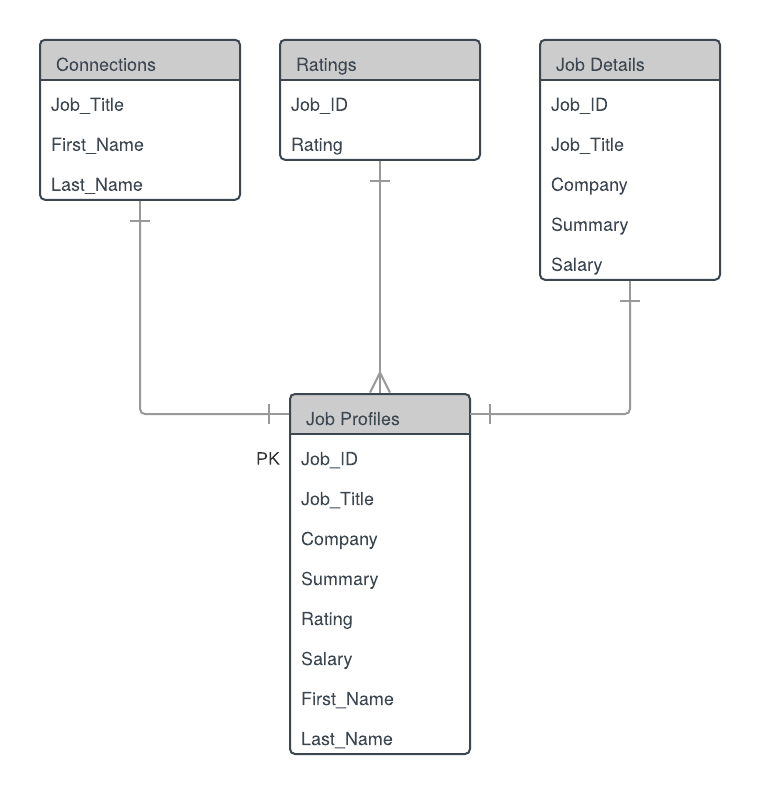

In [44]:
from IPython.display import Image
Image("er_diagram.png")

The above figure shows us an entity-relationship model of three different tables representing, linkedIn connections data (connections), ratings data (ratings), job deatils (Job Details) and job profile data (Job Profiles).

We can use Job_Title to fetch data from my_connections.csv, Job_ID to fetch job details and job ratings from respective tables.

Therefore, we can conclude that on merging the three tables we obtain one table which defines a combined dataset of values from different places yet relatable through shared attributes. In other words, known as a conceptual database schema.

## Report

### Data munging/Data wrangling
Collecting real world data

Data were gathered from two data sources as per the assignment requirement and availability - raw data(csv file) and a web scraper.

LinkedIn connections were exported as a .csv file and used as a raw data source, using pandas and python libraries

Indeed website was scraped to obtain details on required job profiles, using BeautifulSoup, GET requests and html parsers. Web scraped data is stored as a JSON object and operations were performed to clean data.

Indeed API and other web APIs could not be used as mentioned in the top of the document


### Creating a conceptual data model
From the obtained data sources, a conceptual model was created.

### Cleaning and Auditing the data
Data has been audited, duplicate/unneccessary data were found and has been cleaned. Null-values of indispensable data (Salary & Rating) were retained. Therefore, we say the data is accurate as per the conceptual requirement.

The data used in this assignment show a uniform relationship between each dataset as they are linked to each other by a common attribute. So, the data is consistent.

### Professionalism
Through out the assignment, naming convention, logic behind each decision, format, written codes and comments were organized accurately.

Citations have also been recorded at the end of the document.

### Conclusion

Ability to deal with .csv, JSON object and consistent merging of dataframes were shown. 

Munging real world data, cleaning, auditing and development of a conceptual model were shown

##### Contribution

Our Contribution - 40%

External Sources - 40%

Professor and TAs - 20%

### Citations

https://pandas.pydata.org/pandas-docs/

https://docs.python.org/3/

https://opensource.indeedeng.io/api-documentation/docs/job-search/

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python

https://medium.com/@alberto_moura/build-a-jobs-database-using-indeeds-api-8f95316be842

https://jupyter-notebook.readthedocs.io/en/stable/

https://guides.github.com/activities/hello-world/